<a href="https://colab.research.google.com/github/2023garvitshrivastava-sketch/ML_lab/blob/main/Bias_Variance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cross-validation MSE scores: [449.37155315 597.95029146 652.235669   699.86866604 692.46990858]
Mean CV MSE: 618.3792176467376
Test MSE: 726.5840050383297
Bias²: 724.7432484061877
Variance: 9.062545819209069
Bias² + Variance: 733.8057942253968


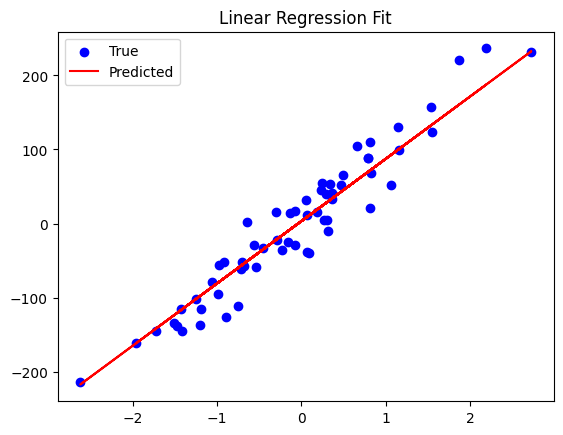

In [1]:
# Simple Evaluation, Cross-Validation, and Bias-Variance Analysis
# Run this in Google Colab

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.utils import resample

# 1. Generate simple synthetic data
X, y = make_regression(n_samples=200, n_features=1, noise=25, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. Model and cross-validation
model = LinearRegression()
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("Cross-validation MSE scores:", -cv_scores)
print("Mean CV MSE:", -np.mean(cv_scores))

# 3. Train model and evaluate
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred)
print("Test MSE:", test_mse)

# 4. Bias-Variance Decomposition (using bootstrap)
n_bootstraps = 100
predictions = np.zeros((n_bootstraps, len(y_test)))

for i in range(n_bootstraps):
    X_samp, y_samp = resample(X_train, y_train)
    model.fit(X_samp, y_samp)
    predictions[i] = model.predict(X_test)

bias2 = np.mean((y_test - np.mean(predictions, axis=0))**2)
variance = np.mean(np.var(predictions, axis=0))
print("Bias²:", bias2)
print("Variance:", variance)
print("Bias² + Variance:", bias2 + variance)

# 5. Visualization
plt.scatter(X_test, y_test, color='blue', label='True')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.title('Linear Regression Fit')
plt.legend()
plt.show()
